# Logistic regression model on Cleveland Heart disease dataset

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing data 
df = pd.read_csv("./cleveland.csv")
df

,63,1,1.1,145,233,1.2,2,150,0,2.3,3,0.1,6,0.2
0,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
1,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
3,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
298,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
299,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
300,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [3]:
# Performing EDA
# Setting up column names
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol','fbs', 'restecg', 'thalach', 'exang','oldpeak', 'slope', 'ca', 'thal', 'target']


In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
1,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
3,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
298,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
299,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
300,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [5]:
# Checking for null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [6]:
# target should contain only two disting values
# 0 --> not having disease
# 1 --> having disease

df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

In [7]:
# Replacing NaN values from 'thal' to it's mean 
thal_mean = df.thal.mean()    # mean thal value

df['thal'] = df.thal.fillna(thal_mean)

In [8]:
# Reaplacing NaN values from 'ca' to it's mean
ca_mean = df.ca.mean()           # mean value of ca
df['ca'] = df.ca.fillna(ca_mean)

In [9]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67,1,4,160,286,0,2,108,1,1.5,2,3.000000,3.0,1
1,67,1,4,120,229,0,2,129,1,2.6,2,2.000000,7.0,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0.000000,3.0,0
3,41,0,2,130,204,0,2,172,0,1.4,1,0.000000,3.0,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0.000000,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45,1,1,110,264,0,0,132,0,1.2,2,0.000000,7.0,1
298,68,1,4,144,193,1,0,141,0,3.4,2,2.000000,7.0,1
299,57,1,4,130,131,0,0,115,1,1.2,2,1.000000,7.0,1
300,57,0,2,130,236,0,2,174,0,0.0,2,1.000000,3.0,1


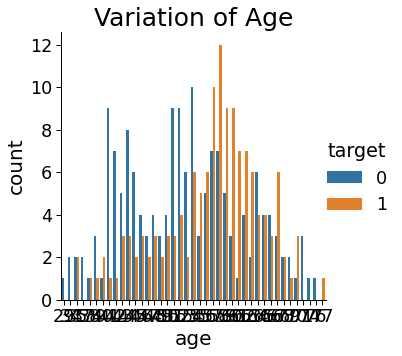

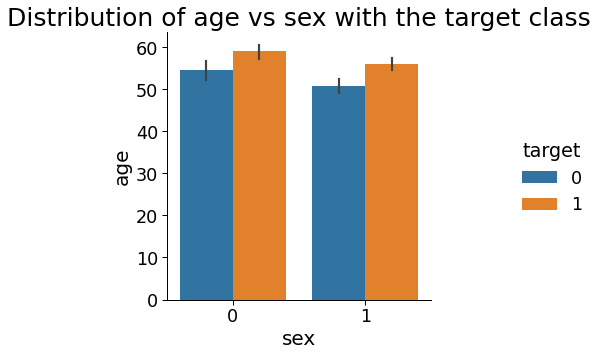

In [10]:
# Visualising the data 
# disribution of 'age' vs 'target'
sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20}) 
sns.catplot(kind = 'count', data = df, x = 'age', hue = 'target', order = df['age'].sort_values().unique())
plt.title('Variation of Age')
plt.show()

# barplot of age vs sex with hue = target
sns.catplot(kind = 'bar', data = df, y = 'age', x = 'sex', hue = 'target')
plt.title('Distribution of age vs sex with the target class')
plt.show()

In [11]:
# X,Y values 
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

# Splitting the data into traning(80%) and tetsting(20%) sets

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# Creating model 
model = LogisticRegression()
model.fit(X_train,Y_train)  # fitting the model with training data 

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
# Predicting the Test set results
y_predict= model.predict(X_test)

In [13]:
# Confusion matrix of testing data
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(Y_test,y_predict)
cm_test

array([[29,  4],
       [ 3, 25]], dtype=int64)

In [14]:
# Confusion matrix between Y_train and _Y_pred_train
# Confusion matrix of training set
y_pred_train = model.predict(X_train)
cm_train = confusion_matrix( Y_train,y_pred_train)
cm_train

array([[119,  11],
       [ 23,  88]], dtype=int64)

In [19]:
# Calculating accuracy score
from sklearn.metrics import accuracy_score
print(f"Accuracy score of training data = {accuracy_score(y_pred_train,Y_train)}")
print(f"accuracy score of testing data = {accuracy_score(y_predict,Y_test)}")

Accuracy score of training data = 0.8589211618257261
accuracy score of testing data = 0.8852459016393442


In [16]:
# Accuracy score by confusion metrix
training_set_accuracy = (cm_train[0][0] + cm_train[1][1])/len(Y_train)
testing_set_accuracy = (cm_test[0][0] + cm_test[1][1])/len(Y_test)

print(f'Accuracy for training set for Logistic Regression = {training_set_accuracy}')
print(f'Accuracy for test set for Logistic Regression = {testing_set_accuracy}')

Accuracy for training set for Logistic Regression = 0.8589211618257261
Accuracy for test set for Logistic Regression = 0.8852459016393442


# Accuracy of model is - 88.52459016393442 %